In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [2]:

# 📁 Base path = where this notebook lives
root_p = Path().resolve()

# 📂 Input paths
validation_p = root_p / '../../output_data/Results/Validation'
data_p = root_p / '../../source_data/Data'

model1_p = validation_p / 'validation_net_split_1_model_1_combined_p_values.tsv'
pheno_valid_p = data_p / 'ABIDE_2_Pheno_PSM_matched_ados.tsv'

# 📂 Output paths
fig_p = root_p / '../../output_data/Supplemental/correlate_severity'
fig_p.mkdir(parents=True, exist_ok=True)

## Load and preparation

In [3]:
pheno_valid = pd.read_csv(pheno_valid_p, sep='\t')
model1 = pd.read_csv(model1_p, sep='\t')
model1.rename(columns={'V1': 'p_ASD', 'V2': 'p_TDC'}, inplace=True)

In [4]:
pheno_valid.loc[:, 'is_hps'] = ((model1.p_ASD>0.2) & (model1.p_TDC<=0.2)).values
pheno_valid.loc[:, 'p_ASD'] = model1.loc[:, 'p_ASD'].values
pheno_valid.loc[:, 'p_TDC'] = model1.loc[:, 'p_TDC'].values

In [5]:
# Compute actual indices to avoid trusting the DF indices
hps_idx = np.where(pheno_valid.is_hps)[0]
non_hps_idx = np.where(~pheno_valid.is_hps)
hps_asd_idx = np.where((pheno_valid.is_hps) & (pheno_valid.DX_GROUP=='Autism'))[0]
non_hps_asd_idx = np.where((~pheno_valid.is_hps) & (pheno_valid.DX_GROUP=='Autism'))[0]

## Drop rows with missing data

In [6]:
pheno_valid_clean = pheno_valid.dropna(subset=['ADOS_CSS_proxy_fully', 'p_ASD'])

## Plot data

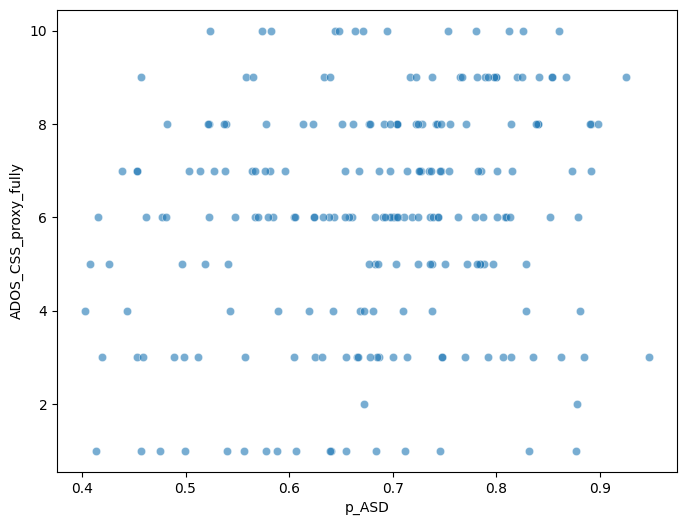

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pheno_valid_clean['p_ASD'], y=pheno_valid_clean['ADOS_CSS_proxy_fully'], alpha=0.6)
plt.show()

# Save the figure

In [8]:
# 🖼️ Save figure
fig_out_p = fig_p / 'figure_2_scatter.png'
plt.savefig(fig_out_p, dpi=300, bbox_inches='tight')
print(f"💾 Saved supplemental figure: {fig_out_p}")

💾 Saved supplemental figure: /home/lune/git/autism-signature/code/supplemental/../../output_data/Supplemental/correlate_severity/figure_2_scatter.png


<Figure size 640x480 with 0 Axes>

## Compute Pearson correlation

In [9]:
pearson_corr, pearson_p = stats.pearsonr(pheno_valid_clean['ADOS_CSS_proxy_fully'], pheno_valid_clean['p_ASD'])
print(f"Pearson Correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")

Pearson Correlation: 0.186, p-value: 0.005


In [10]:
hps_asd_data = pheno_valid.iloc[hps_asd_idx]
hps_asd_data_clean = hps_asd_data.dropna(subset=['ADOS_CSS_proxy_fully', 'p_ASD'])
hps_asd_pearson_corr, hps_asd_pearson_p = stats.pearsonr(hps_asd_data_clean['ADOS_CSS_proxy_fully'], hps_asd_data_clean['p_ASD'])
print(f"HPS + Autism Pearson Correlation: {hps_asd_pearson_corr:.3f}, p-value: {hps_asd_pearson_p:.3f}")

HPS + Autism Pearson Correlation: -0.194, p-value: 0.617
